In [2]:
import qiskit
import qiskit_aer
import matplotlib.pyplot as plt
%matplotlib inline

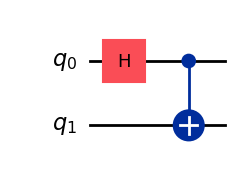

In [5]:
# 2 qubit circuit
circ = qiskit.QuantumCircuit(2)
# add a H gate on qubit 0 and 1
circ.h(0)
# add a CNOT gate on qubits 1 and 2 and a H on qubit 1
circ.cx(0, 1)
circ.draw('mpl', filename = 'phi_plus.png')

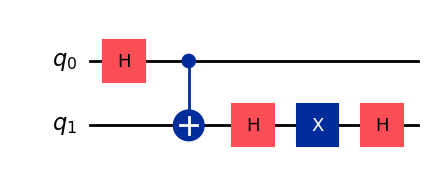

In [36]:
# 2 qubit circuit
circ = qiskit.QuantumCircuit(2)
# add a H gate on qubit 0 and 1
circ.h(0)
# add a CNOT gate on qubits 1 and 2 and a H on qubit 1
circ.cx(0, 1)
circ.h(1)
circ.x(1)
circ.h(1)
circ.draw('mpl', filename = 'phi_min.png')

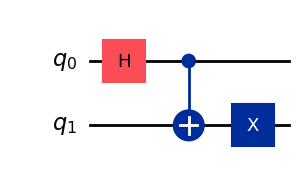

In [37]:
# 2 qubit circuit
circ = qiskit.QuantumCircuit(2)
# add a H gate on qubit 0 and 1
circ.h(0)
# add a CNOT gate on qubits 1 and 2 and a H on qubit 1
circ.cx(0, 1)
circ.x(1)
circ.draw('mpl', filename = 'psi_plus.png')

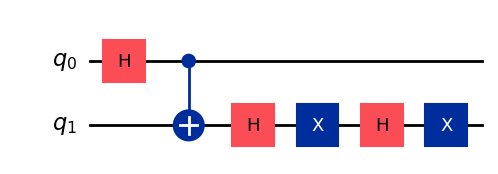

In [38]:
# 2 qubit circuit
circ = qiskit.QuantumCircuit(2)
# add a H gate on qubit 0 and 1
circ.h(0)
# add a CNOT gate on qubits 1 and 2 and a H on qubit 1
circ.cx(0, 1)
circ.h(1)
circ.x(1)
circ.h(1)
circ.x(1)
circ.draw('mpl', filename = 'psi_min.png')

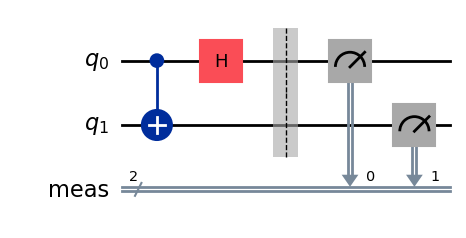

In [11]:
# 2 qubit circuit
circ = qiskit.QuantumCircuit(2)
# add a H gate on qubit 0 and 1

# add a CNOT gate on qubits 1 and 2 and a H on qubit 1
circ.cx(0, 1)
circ.h(0)
circ.measure_all()
circ.draw('mpl', filename = 'readoutEPR.png')

# phi_plus 00 -> correction id
# phi minus 10 -> z
# psi plus 01 -> x
# psi minus 11 -> xz


In [13]:
def teleport(Statevector):
    bell = qiskit.QuantumRegister(3, name='q') #ab
    clas = qiskit.ClassicalRegister(2, name='c')
    circ = qiskit.QuantumCircuit(bell, clas)
    
    circ.initialize(Statevector, [2])
    
    circ.h(0)
    circ.cx(0, 1)
    circ.barrier()
    circ.cx(0, 2)
    circ.h(0)
    
    circ.measure(0,0)
    circ.measure(2,1)
    
    circ.z(1).c_if(0, 1)
    circ.x(1).c_if(1, 1)
    
    return circ

In [15]:
from qiskit_aer import AerSimulator

sim = AerSimulator(method="statevector")
state = qiskit.quantum_info.random_statevector(2, seed=100)
tele = teleport(state)
tele.draw('mpl', filename = 'tele.png')
tele.save_statevector()
result = sim.run(tele).result()
psi = result.get_statevector()
qiskit.visualization.plot_bloch_multivector(psi, filename = 'after_tele.png')

In [24]:
init = qiskit.quantum_info.Statevector([1, 0, 0, 0])
qiskit.visualization.plot_bloch_multivector(init)
teleinit = state.tensor(init)
qiskit.visualization.plot_bloch_multivector(teleinit, filename = 'b4_tele.png')

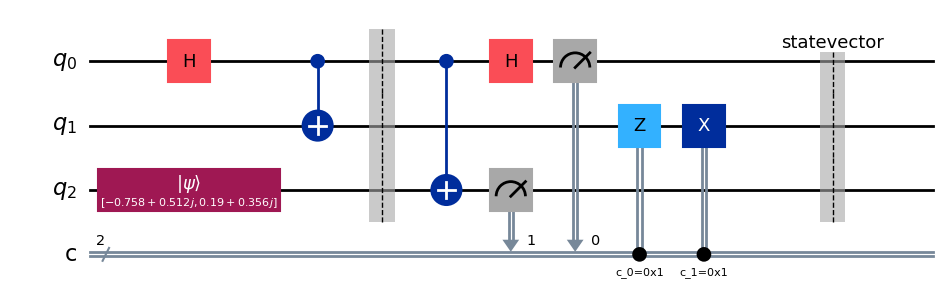

In [10]:
tele.draw('mpl')

In [34]:
#exercise 11
# 2 qubit circuit
def vari(a,b):
    circ = qiskit.QuantumCircuit(2)
    circ.h(1)
    circ.rzz(-2*b,0,1)
    circ.h(1)

    #circ.barrier()
    circ.h(0)
    circ.rzz(-2*b,0,1)
    circ.h(0)

    #circ.barrier()
    circ.rz(-2*a, 0)
    #circ.barrier() # visual barrie
    circ.rz(-2*a, 1)
    return circ

14 14
a = 2.3148577447503738, b = 2.3148577447503738
lowest energy = -1.988


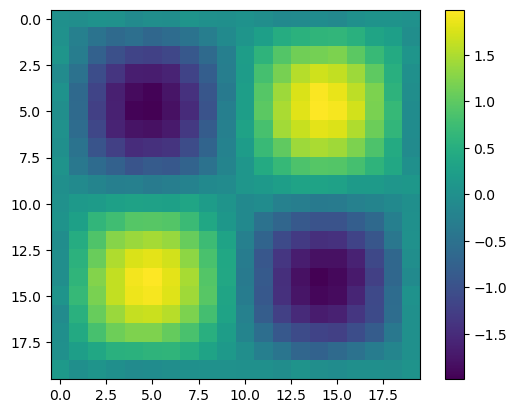

In [35]:
from qiskit_aer.noise import NoiseModel, amplitude_damping_error
sampling = 20
expect = np.zeros((sampling, sampling))
range = np.linspace(0, np.pi, sampling)

for i in np.arange(np.size(range)):
    for j in np.arange(np.size(range)):
        
        QVE = vari(range[i],range[j])
        xz = qiskit.QuantumCircuit(2)
        zx = qiskit.QuantumCircuit(2)
        xz = xz.compose(QVE)
        zx = zx.compose(QVE)

        xz.h(0)
        zx.h(1)
        xz.measure_all()
        zx.measure_all()

        sim3 = AerSimulator()
        sim4 = AerSimulator()
        shot = 1000
        result_0 = sim3.run(xz, shots = shot).result().get_counts()
        result_1 = sim4.run(zx, shots = shot).result().get_counts()
        total = 0
        norm = 0
        for binary_str, count in result_0.items():
            string_sum = 1
            # Iterate through each character in the binary string
            for char in binary_str:
                if char == '0':
                    string_sum *= 1  # 0 is multiplied by 1
                elif char == '1':
                    string_sum *= -1  # 1 is multiplied by -1
           # Multiply the sum of the current binary string by the count and add to total
            total += string_sum * count / shot
                
        for binary_str, count in result_1.items():
            string_sum = 1
            # Iterate through each character in the binary string
            for char in binary_str:
                if char == '0':
                    string_sum *= 1  # 0 is multiplied by 1
                elif char == '1':
                    string_sum *= -1  # 1 is multiplied by -1
           # Multiply the sum of the current binary string by the count and add to total
            total += string_sum * count /shot
        expect[i,j] = -total

plt.imshow(expect)
plt.colorbar()
plt.savefig('vqe_clean.png', dpi = 300)
index = np.argmin(expect)
x = index % sampling
y = index // sampling
print(x,y)
print(f'a = {range[x]}, b = {range[y]}')
print(f'lowest energy = {np.min(expect)}')

In [ ]:
QVE = vari(0.5,0.5)
QVE.draw('mpl', filename = 'QVE_circuit.png')


In [31]:
#final state
QVE = vari(range[x], range[y])
QVE.save_statevector()
sim4 = AerSimulator()
result = sim4.run(QVE).result()
psi = result.get_statevector()
display(psi.draw('latex'))

<IPython.core.display.Latex object>

15 15
a = 2.4802047265182576, b = 2.4802047265182576
lowest energy = -0.58


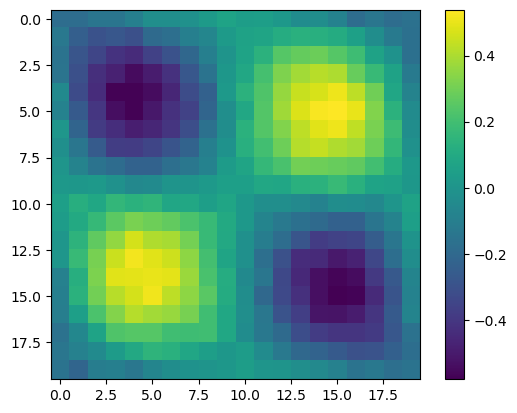

In [32]:
from qiskit_aer.noise import NoiseModel, amplitude_damping_error
sampling = 20
expect = np.zeros((sampling, sampling))
range = np.linspace(0, np.pi, sampling)

for i in np.arange(np.size(range)):
    for j in np.arange(np.size(range)):
        
        QVE = vari(range[i],range[j])
        xz = qiskit.QuantumCircuit(2)
        zx = qiskit.QuantumCircuit(2)
        xz = xz.compose(QVE)
        zx = zx.compose(QVE)

        xz.h(0)
        zx.h(1)
        xz.measure_all()
        zx.measure_all()

        noise = NoiseModel()
        GAD = amplitude_damping_error(0.1, 0.1)

        noise.add_all_qubit_quantum_error(GAD, ['rz', 'h'])
        noise.add_all_qubit_quantum_error(GAD.tensor(GAD), ['rzz'])

        sim3 = AerSimulator(noise_model = noise)
        sim4 = AerSimulator(noise_model = noise)
        shot = 1000
        result_0 = sim3.run(xz, shots = shot).result().get_counts()
        result_1 = sim4.run(zx, shots = shot).result().get_counts()
        total = 0
        for binary_str, count in result_0.items():
            string_sum = 1
            # Iterate through each character in the binary string
            for char in binary_str:
                if char == '0':
                    string_sum *= 1  # 0 is multiplied by 1
                elif char == '1':
                    string_sum *= -1  # 1 is multiplied by -1
           # Multiply the sum of the current binary string by the count and add to total
            total += string_sum * count
            
        for binary_str, count in result_1.items():
            string_sum = 1
            # Iterate through each character in the binary string
            for char in binary_str:
                if char == '0':
                    string_sum *= 1  # 0 is multiplied by 1
                elif char == '1':
                    string_sum *= -1  # 1 is multiplied by -1
           # Multiply the sum of the current binary string by the count and add to total
            total += string_sum * count
        expect[i,j] = -total / shot /2

plt.imshow(expect)
plt.colorbar()
plt.savefig('vqe_noise.png', dpi = 300)
index = np.argmin(expect)
x = index % sampling
y = index // sampling
print(x,y)
print(f'a = {range[x]}, b = {range[y]}')
print(f'lowest energy = {np.min(expect)}')

In [33]:
#final state
QVE = vari(range[x], range[y])
QVE.save_statevector()
sim4 = AerSimulator()
result = sim4.run(QVE).result()
psi = result.get_statevector()
display(psi.draw('latex'))

<IPython.core.display.Latex object>